In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Image

In [14]:
img_path = 'data/catexample.jpg'

img = cv2.imread(img_path) # read image from path
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

gray_img = gray_img/255.0 # normalise image

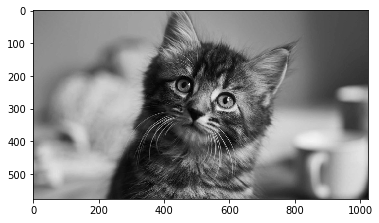

In [15]:
plt.imshow(gray_img, cmap='gray')
plt.show()

# Simple filter

In [4]:
# 3x3 filter -- vertical/ horizontal edges
filter_3 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filter_3_1 = filter_3 # Vertical left to right
filter_3_2 = -filter_3 # Vertical right to left
filter_3_3 = filter_3.T # Horizontal up to down
filter_3_4 = -filter_3.T # Horizontal down to up

# 5x5 filters -- vertical/ horizontal edges with differing magnitude
filter_5 = np.array([
    [-2, -1, 0, 1, 2],
    [-4, -2, 0, 2, 4],
    [-6, -3, 0, 3, 6],
    [-4, -2, 0, 2, 4],
    [-2, -1, 0, 1, 2]
])
filter_5_1 = filter_5 # Vertical left to right
filter_5_2 = -filter_5 # Vertical right to left
filter_5_3 = filter_5.T # Horizontal up to down
filter_5_4 = -filter_5.T # Horizontal down to up

# 3x3 filter -- slanted edges
filter_slant = np.array([
    [0, 1, 3],
    [-1, 0, 1],
    [-3, -1, 0]
])
filter_slant_1 = filter_slant # original
filter_slant_2 = -filter_slant # Opposite
filter_slant_3 = filter_slant.T # Flipped
filter_slant_4 = -filter_slant.T # Flipped and opposite

In [5]:
print(f'1st filter \n{filter_3_1}')
print(f'2nd filter \n{filter_5_3}')
print(f'3rd filter \n{filter_slant_4}')

1st filter 
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
2nd filter 
[[-2 -4 -6 -4 -2]
 [-1 -2 -3 -2 -1]
 [ 0  0  0  0  0]
 [ 1  2  3  2  1]
 [ 2  4  6  4  2]]
3rd filter 
[[ 0  1  3]
 [-1  0  1]
 [-3 -1  0]]


In [6]:
filters = {
    '3x3' : np.array([filter_3_1, filter_3_2, filter_3_3, filter_3_4]),
    '5x5' : np.array([filter_5_1, filter_5_2, filter_5_3, filter_5_4]),
    'slanted' : np.array([filter_slant_1, filter_slant_2, filter_slant_3, filter_slant_4])
}

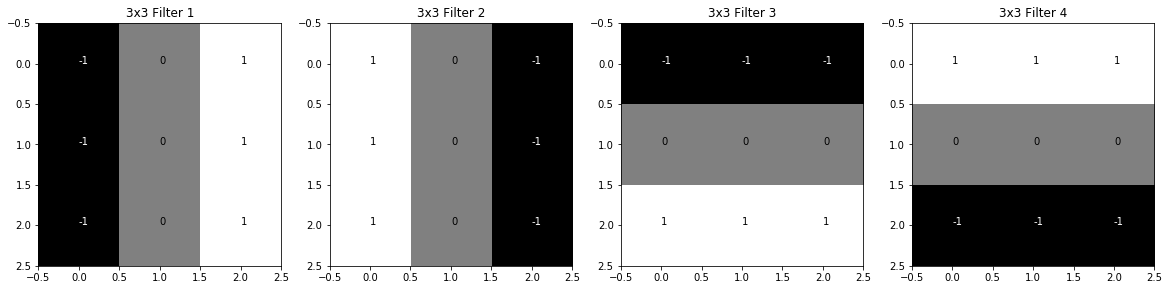

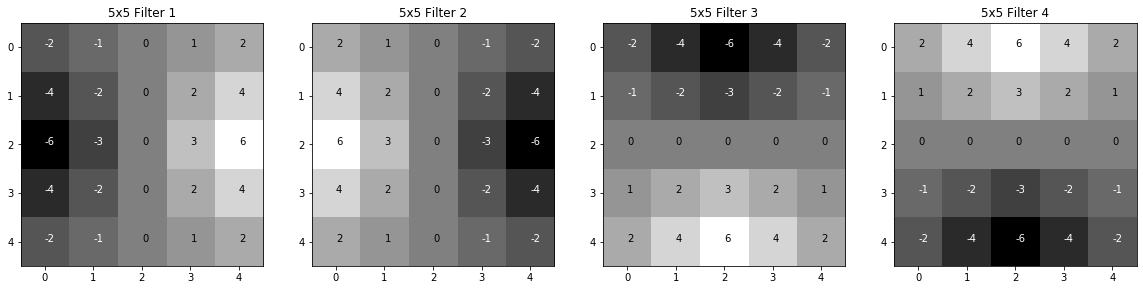

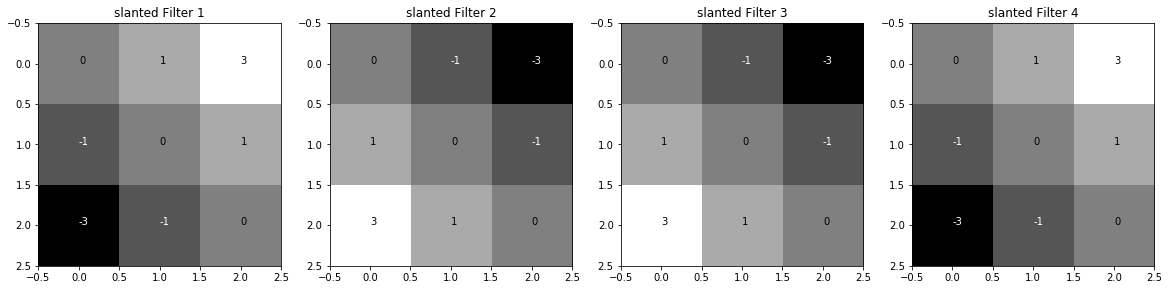

In [7]:
# plotting all the filters
for name, kernels in filters.items():
    fig = plt.figure(figsize=(20,20))
    
    for i in range(len(kernels)):
        ax = fig.add_subplot(1, len(kernels), i+1)
        ax.imshow(kernels[i], cmap='gray')
        ax.set_title(f'{name} Filter {i+1}')
        width, height = kernels[i].shape
        for x in range(width):
            for y in range(height):
                ax.annotate(str(kernels[i][x][y]),
                            xy=(y,x), 
                            color='white' if kernels[i][x][y]<0 else 'black'
                           )
    plt.show()

# Visualising the output of a CNN

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Simple_CNN(nn.Module):
    
    def __init__(self, weight):
        super(Simple_CNN, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the defined filters
        k_height, k_width = weight.shape[2:]
        # gray_scale input, 4 filters (out_channel)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
        # pooling layer
        self.pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        # 1 layer NN
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pool_x = self.pool(activated_x)
        
        # returns both layers
        return conv_x, activated_x, pool_x

In [9]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
    plt.show()

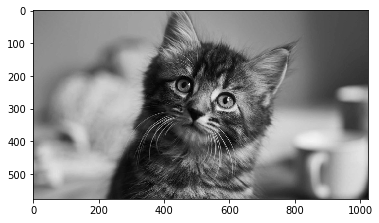

3X3 Filter:


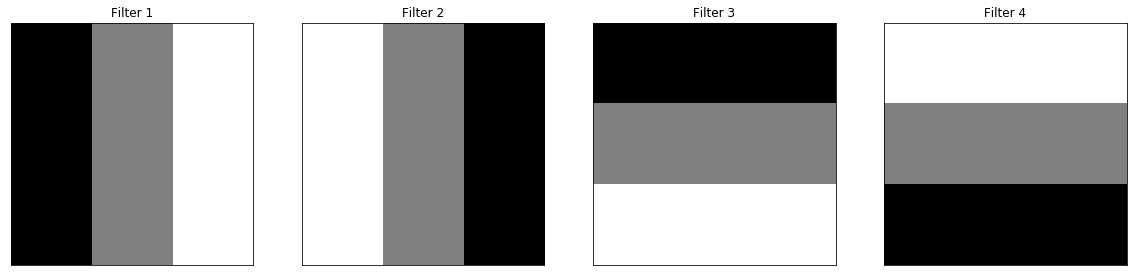

Convolution Layer


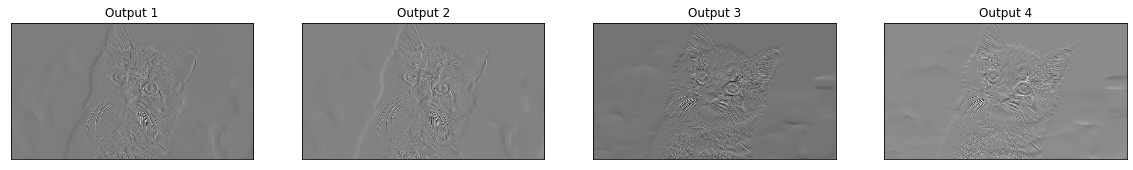

ReLU


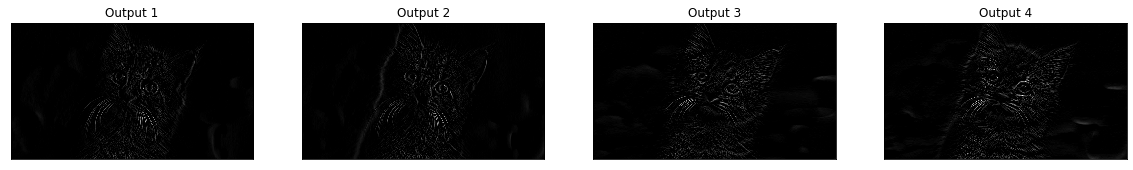

Pooling layer


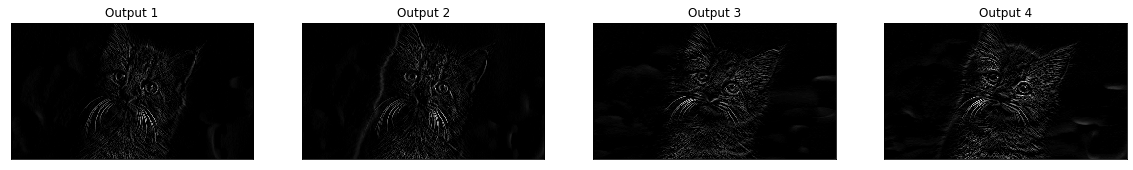

5X5 Filter:


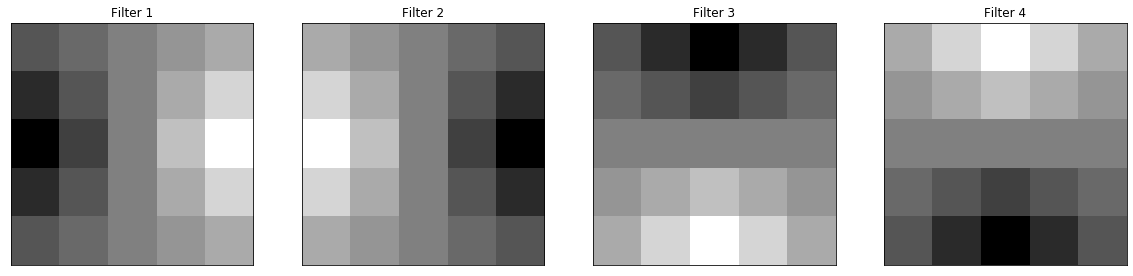

Convolution Layer


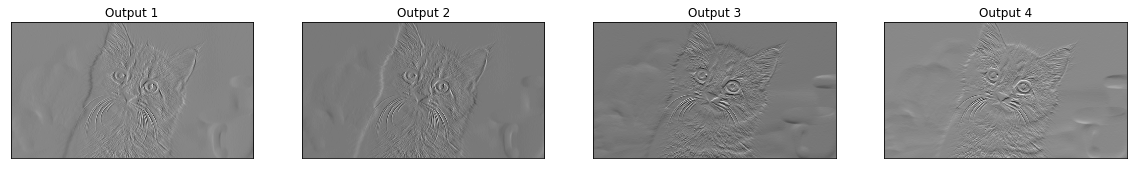

ReLU


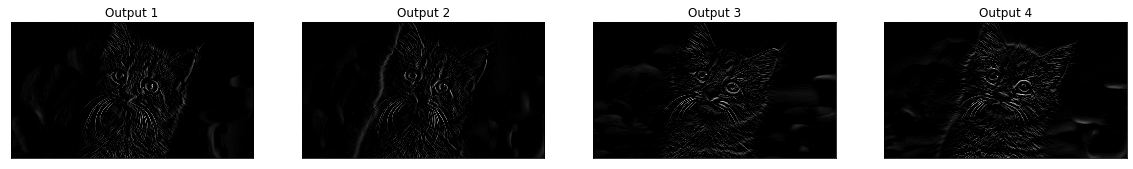

Pooling layer


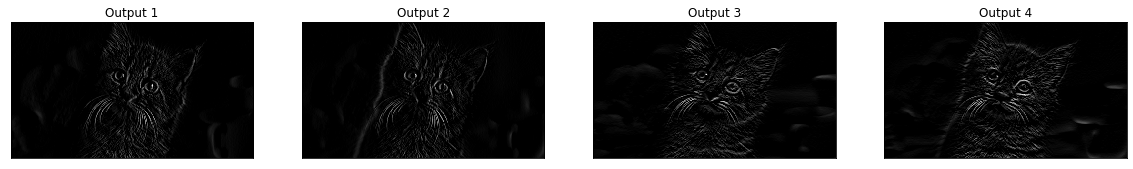

SLANTED Filter:


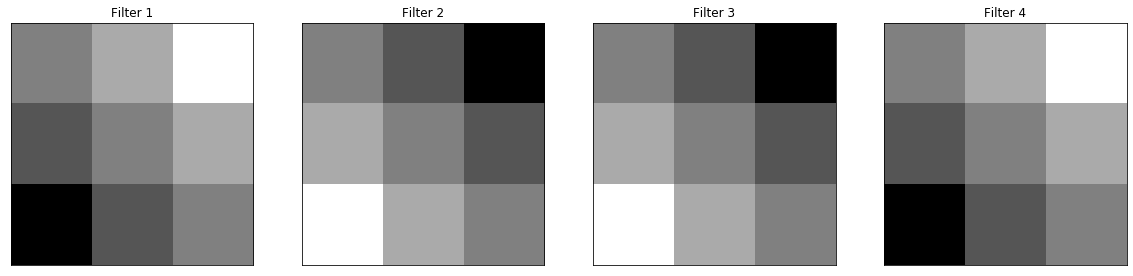

Convolution Layer


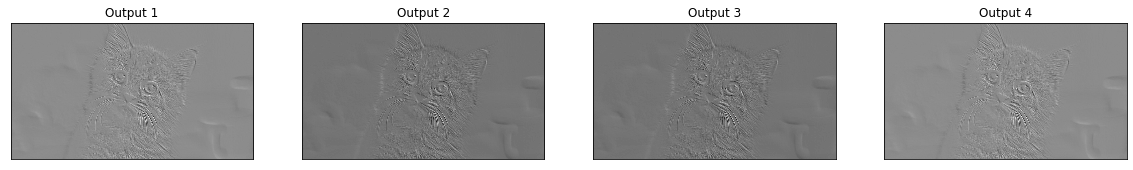

ReLU


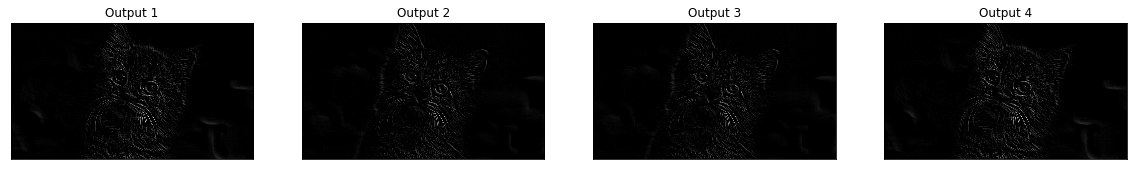

Pooling layer


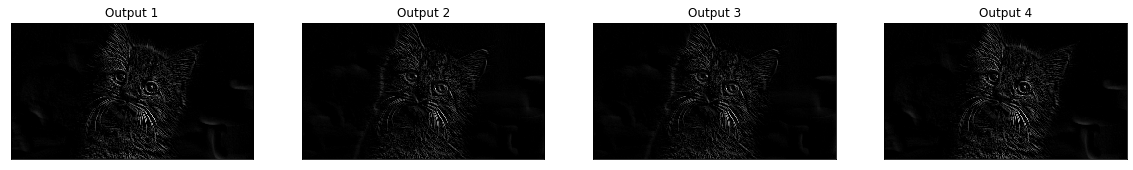

In [17]:
# plot original image
plt.imshow(gray_img, cmap='gray')
plt.show()

for name, kernels in filters.items():
    
    print(f'{name.upper()} Filter:')
    # visualize current filters
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
        ax.imshow(kernels[i], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))
    plt.show()
    
    # instantiate the model and set the weights
    weight = torch.from_numpy(kernels).unsqueeze(1).double()
    model = Simple_CNN(weight)
    
    # convert the image into an input Tensor
    gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

    # get the convolutional layer (pre and post activation)
    conv_layer, activated_layer, pool_layer = model(gray_img_tensor)
    
    print('Convolution Layer')
    # visualize the output of a conv layer
    viz_layer(conv_layer)
    print('ReLU')
    viz_layer(activated_layer)
    print('Pooling layer')
    viz_layer(pool_layer)

# Another photo

In [18]:
img_path = 'data/sg_skyline.jpeg'

img = cv2.imread(img_path) # read image from path
img = img/255.0 # normalise image

In [19]:
# define a neural network with a single convolutional layer with four filters
class Simple_CNN(nn.Module):
    
    def __init__(self, weight):
        super(Simple_CNN, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the defined filters
        k_height, k_width = weight.shape[2:]
        # 3 input channels, 4 filters (out_channel)
        self.conv = nn.Conv2d(3, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
        # pooling layer
        self.pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        # 1 layer NN
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pool_x = self.pool(activated_x)
        
        # returns both layers
        return conv_x, activated_x, pool_x

In [24]:
# Input dimensions
img_input = img.reshape(3, 771, 1000)
print(img_input.shape) # (n_channels, height, width)

# Filter dimensions
weight = np.repeat(filters['3x3'], 3).reshape(-1, 3, 3, 3)
weight = torch.from_numpy(weight).double()
print(weight.shape)

(3, 771, 1000)
torch.Size([4, 3, 3, 3])


In [21]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()))
        ax.set_title('Output %s' % str(i+1))
    plt.show()

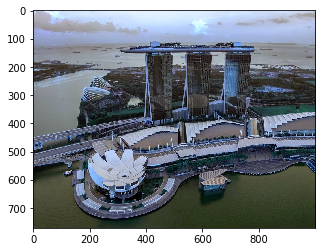

3X3 Filter:


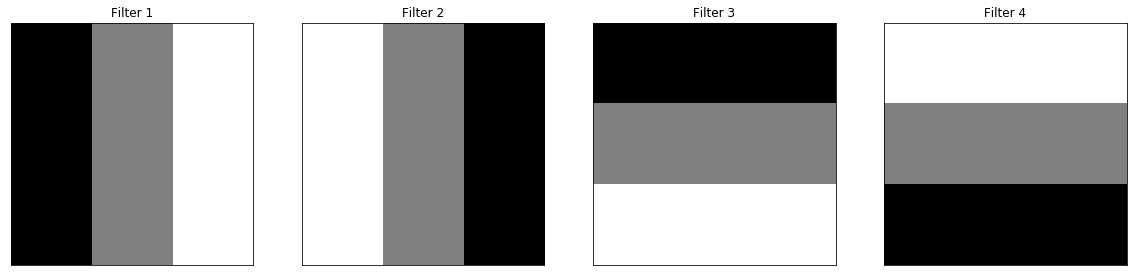

3X3 Filter:
Convolution Layer


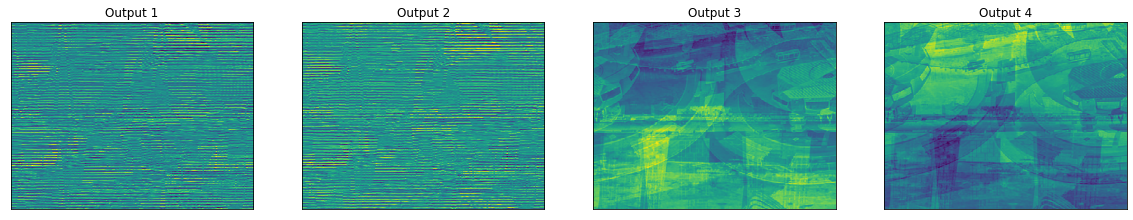

ReLU


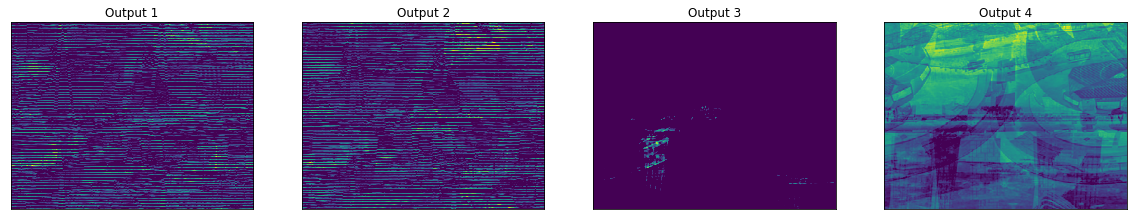

Pooling layer


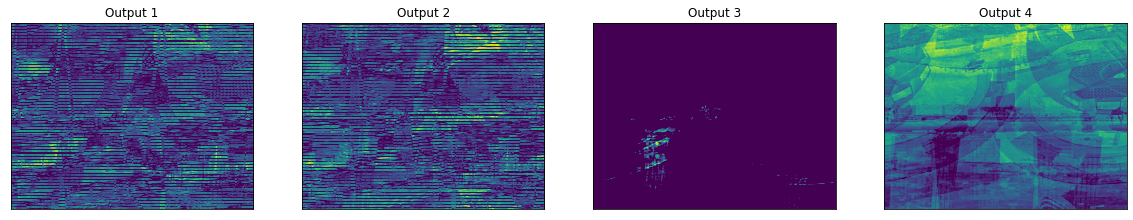

5X5 Filter:


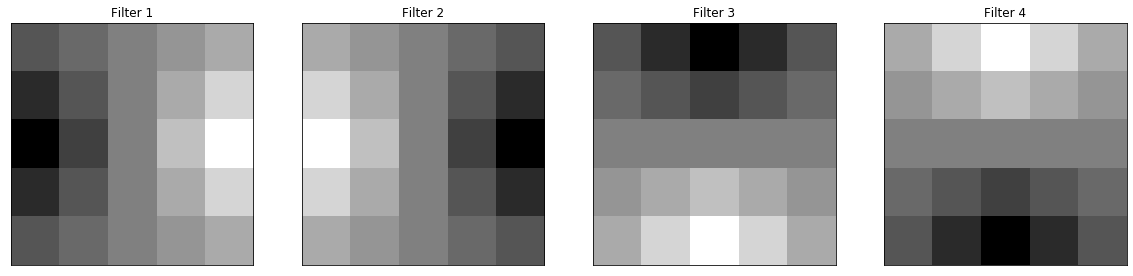

5X5 Filter:
Convolution Layer


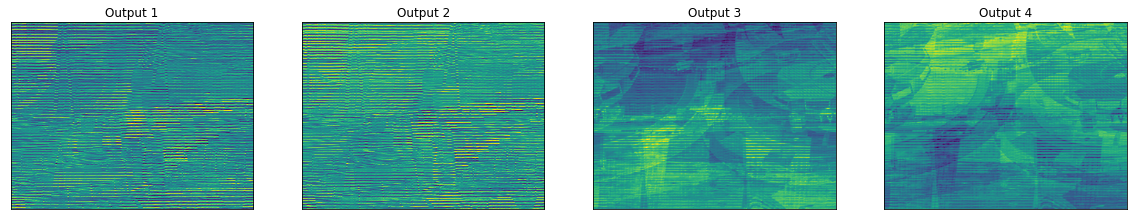

ReLU


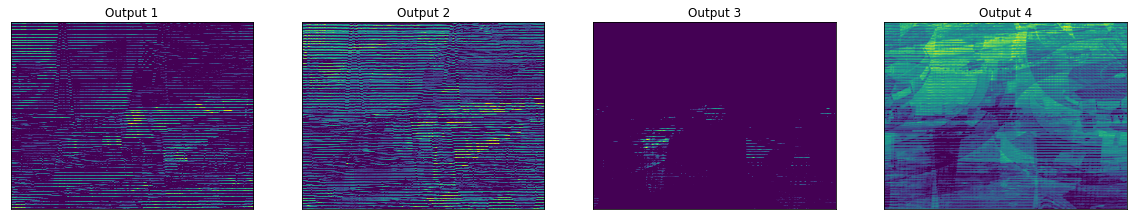

Pooling layer


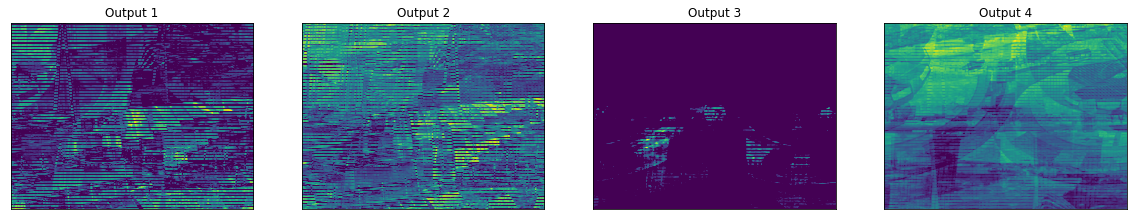

SLANTED Filter:


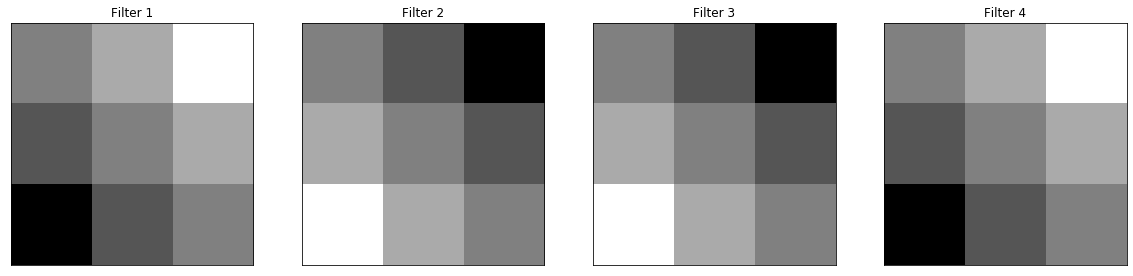

SLANTED Filter:
Convolution Layer


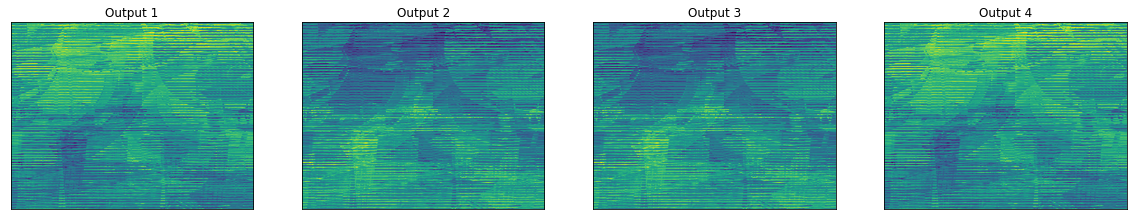

ReLU


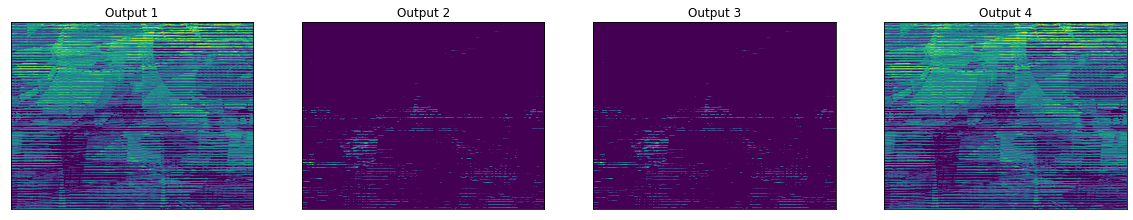

Pooling layer


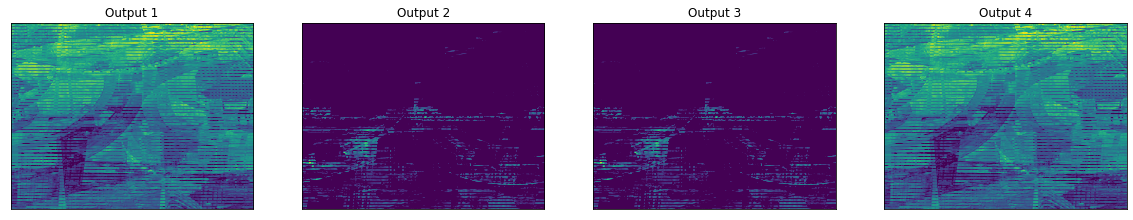

In [23]:
# plot original image
plt.imshow(img)
plt.show()

for name, kernels in filters.items():
    
    print(f'{name.upper()} Filter:')
    # visualize current filters
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
        ax.imshow(kernels[i], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))
    plt.show()
    
    # instantiate the model and set the weights
    weight = np.repeat(kernels, 3).reshape(-1, 3, kernels.shape[1], kernels.shape[2])
    weight = torch.from_numpy(weight).double()
    model = Simple_CNN(weight)
    
    # convert the image into an input Tensor
    img_tensor = torch.from_numpy(img_input).unsqueeze(0)

    # get the convolutional layer (pre and post activation)
    conv_layer, activated_layer, pool_layer = model(img_tensor)
    
    print(f'{name.upper()} Filter:')
    print('Convolution Layer')
    # visualize the output of a conv layer
    viz_layer(conv_layer)
    print('ReLU')
    viz_layer(activated_layer)
    print('Pooling layer')
    viz_layer(pool_layer)

# Trying combinations

In [50]:
filters_combi1 = np.concatenate([filter_3_1, filter_3_3, filter_slant_2]).reshape(3,3,3)
filters_combi2 = np.concatenate([filter_3_4, filter_slant_3, filter_3_1]).reshape(3,3,3)
filters_combi3 = np.concatenate([filter_3_4, filter_3_2, filter_slant_4]).reshape(3,3,3)
filters_combi4 = np.concatenate([filter_slant_1, filter_3_3, filter_3_2]).reshape(3,3,3)

filters_combi = np.concatenate([filters_combi1, filters_combi2, filters_combi3, filters_combi4]).reshape(4,3,3,3)

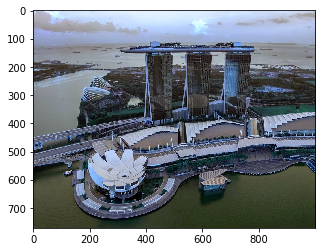

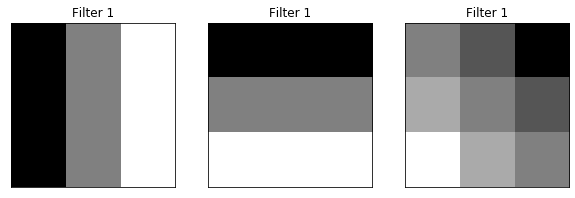

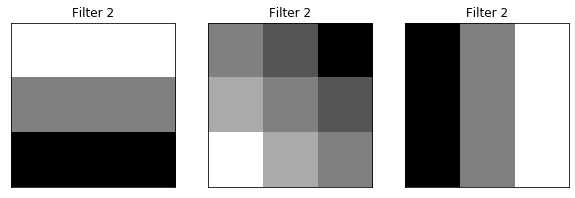

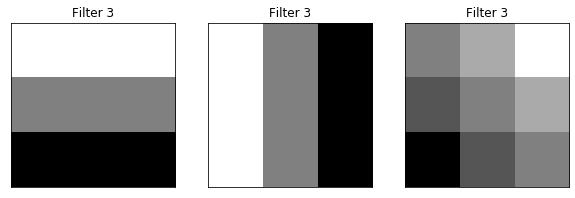

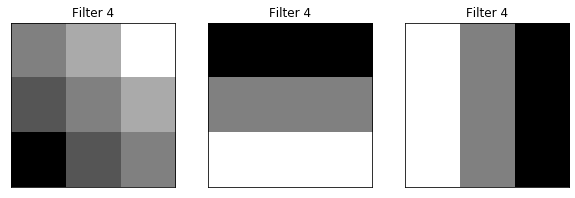

SLANTED Filter:
Convolution Layer


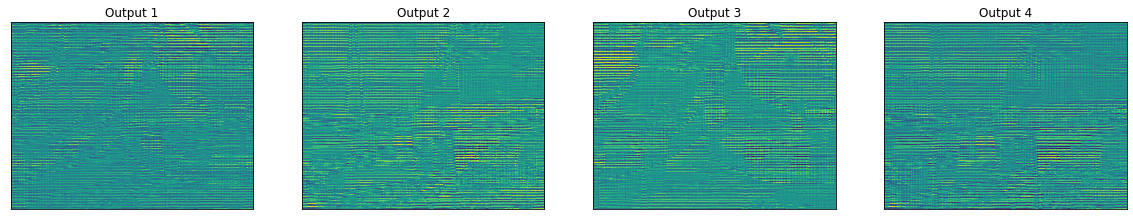

ReLU


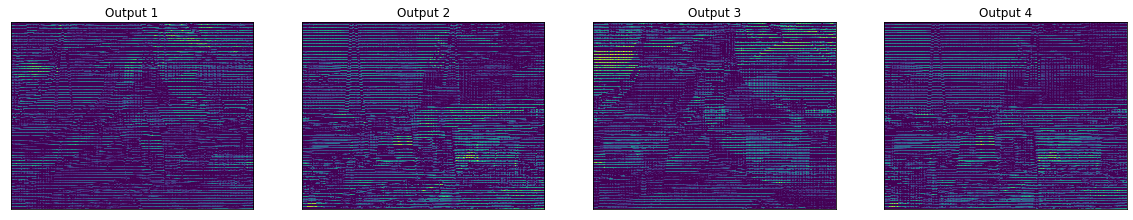

Pooling layer


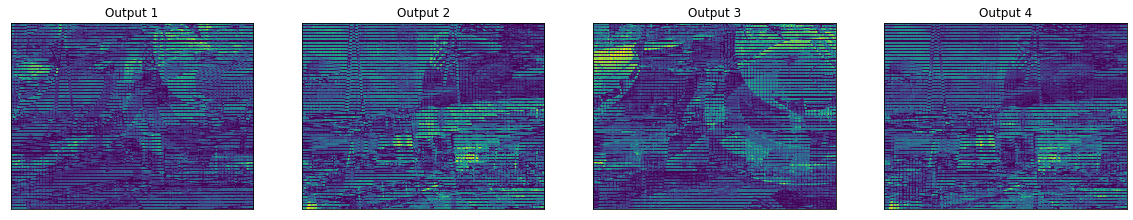

In [51]:
# plot original image
plt.imshow(img)
plt.show()

# visualize current filters
for i in range(4):
    fig = plt.figure(figsize=(10, 10))
    for j in range(3):
        ax = fig.add_subplot(1, 3, j+1, xticks=[], yticks=[])
        ax.imshow(filters_combi[i][j], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))
    plt.show()

# instantiate the model and set the weights
weight = torch.from_numpy(filters_combi).double()
model = Simple_CNN(weight)

# convert the image into an input Tensor
img_tensor = torch.from_numpy(img_input).unsqueeze(0)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pool_layer = model(img_tensor)

print(f'{name.upper()} Filter:')
print('Convolution Layer')
# visualize the output of a conv layer
viz_layer(conv_layer)
print('ReLU')
viz_layer(activated_layer)
print('Pooling layer')
viz_layer(pool_layer)